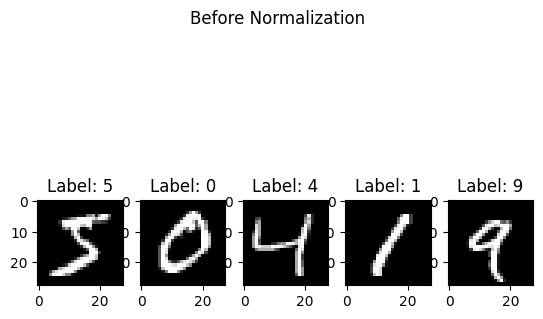

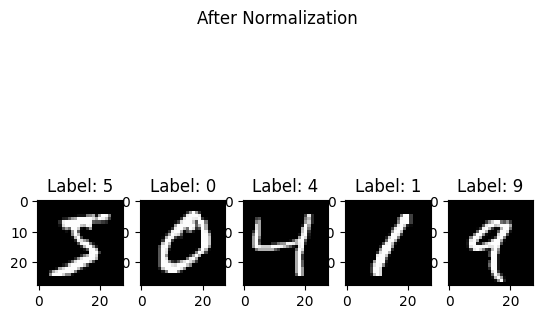

In [18]:
import sys, numpy as np
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
plt.suptitle("Before Normalization")
plt.show()

images, labels = (x_train[0:1000].reshape(1000, 28 * 28) / 255, y_train[0:1000])

# Display the first five images after normalization
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(images[i].reshape(28, 28), cmap='gray')
    plt.title(f"Label: {labels[i]}")
plt.suptitle("After Normalization")
plt.show()

one_hot_labels = np.zeros((len(labels),10))
for i,l in enumerate(labels):
    one_hot_labels[i][l] = 1
labels = one_hot_labels

test_images = x_test.reshape(len(x_test),28*28) / 255
test_labels = np.zeros((len(y_test),10))
for i,l in enumerate(y_test):
    test_labels[i][l] = 1


In [19]:
i = 0
layer_0 = images[i:i+1]
dropout_mask = np.random.randint(2,size=layer_1.shape)

layer_1 *= dropout_mask * 2
layer_2 = np.dot(layer_1, weights_1_2)

error += np.sum((labels[i:i+1] - layer_2) ** 2)

correct_cnt += int(np.argmax(layer_2) == np.argmax(labels[i+i+1]))

layer_2_delta = (labels[i:i+1] - layer_2)
layer_1_delta = layer_2_delta.dot(weights_1_2.T) * relu2deriv(layer_1)

layer_1_delta *= dropout_mask

weights_1_2 += alpha * layer_1.T.dot(layer_2_delta)
weights_0_1 += alpha * layer_0.T.dot(layer_1_delta)

In [21]:
import numpy, sys
import matplotlib.pyplot as plt
np.random.seed(1)
def relu(x):
    return (x >= 0) * x # returns x if x > 0
                        # returns 0 otherwise

def relu2deriv(output):
    return output >= 0 #returns 1 for input > 0

alpha, iterations, hidden_size = (0.005, 300, 100)
pixels_per_image, num_labels = (784, 10)

weights_0_1 = 0.2*np.random.random((pixels_per_image,hidden_size)) - 0.1
weights_1_2 = 0.2*np.random.random((hidden_size,num_labels)) - 0.1

train_errors = []
train_accuracies = []
test_errors = []
test_accuracies = []

for j in range(iterations):
    error, correct_cnt = (0.0,0)
    for i in range(len(images)):
        layer_0 = images[i:i+1]
        layer_1 = relu(np.dot(layer_0,weights_0_1))
        dropout_mask = np.random.randint(2, size=layer_1.shape)
        layer_1 *= dropout_mask * 2
        layer_2 = np.dot(layer_1,weights_1_2)

        error += np.sum((labels[i:i+1] - layer_2) ** 2)
        correct_cnt += int(np.argmax(layer_2) == np.argmax(labels[i:i+1]))
        layer_2_delta = (labels[i:i+1] - layer_2)
        layer_1_delta = layer_2_delta.dot(weights_1_2.T) * relu2deriv(layer_1)
        layer_1_delta *= dropout_mask

        weights_1_2 += alpha * layer_1.T.dot(layer_2_delta)
        weights_0_1 += alpha * layer_0.T.dot(layer_1_delta)

    if(j%10 == 0):
        test_error = 0.0
        test_correct_cnt = 0

        for i in range(len(test_images)):
            layer_0 = test_images[i:i+1]
            layer_1 = relu(np.dot(layer_0,weights_0_1))
            layer_2 = np.dot(layer_1, weights_1_2)

            test_error += np.sum((test_labels[i:i+1] - layer_2) ** 2)
            test_correct_cnt += int(np.argmax(layer_2) == np.argmax(test_labels[i:i+1]))
            
        train_errors.append(error / len(images))
        train_accuracies.append(correct_cnt / len(images))
        test_errors.append(test_error / len(test_images))
        test_accuracies.append(test_correct_cnt / len(test_images))

        sys.stdout.write("\n" + \
                         "I:" + str(j) + \
                         " Test-Err:" + str(test_error/ float(len(test_images)))[0:5] +\
                         " Test-Acc:" + str(test_correct_cnt/ float(len(test_images)))+\
                         " Train-Err:" + str(error/ float(len(images)))[0:5] +\
                         " Train-Acc:" + str(correct_cnt/ float(len(images))))


I:0 Test-Err:0.641 Test-Acc:0.6333 Train-Err:0.891 Train-Acc:0.413
I:10 Test-Err:0.458 Test-Acc:0.787 Train-Err:0.472 Train-Acc:0.764
I:20 Test-Err:0.415 Test-Acc:0.8133 Train-Err:0.430 Train-Acc:0.809
I:30 Test-Err:0.421 Test-Acc:0.8114 Train-Err:0.415 Train-Acc:0.811
I:40 Test-Err:0.419 Test-Acc:0.8112 Train-Err:0.413 Train-Acc:0.827
I:50 Test-Err:0.409 Test-Acc:0.8133 Train-Err:0.392 Train-Acc:0.836
I:60 Test-Err:0.412 Test-Acc:0.8236 Train-Err:0.402 Train-Acc:0.836
I:70 Test-Err:0.412 Test-Acc:0.8033 Train-Err:0.383 Train-Acc:0.857
I:80 Test-Err:0.410 Test-Acc:0.8054 Train-Err:0.386 Train-Acc:0.854
I:90 Test-Err:0.411 Test-Acc:0.8144 Train-Err:0.376 Train-Acc:0.868
I:100 Test-Err:0.411 Test-Acc:0.7903 Train-Err:0.369 Train-Acc:0.864
I:110 Test-Err:0.411 Test-Acc:0.8003 Train-Err:0.371 Train-Acc:0.868
I:120 Test-Err:0.402 Test-Acc:0.8046 Train-Err:0.353 Train-Acc:0.857
I:130 Test-Err:0.408 Test-Acc:0.8091 Train-Err:0.352 Train-Acc:0.867
I:140 Test-Err:0.405 Test-Acc:0.8083 Train-Er

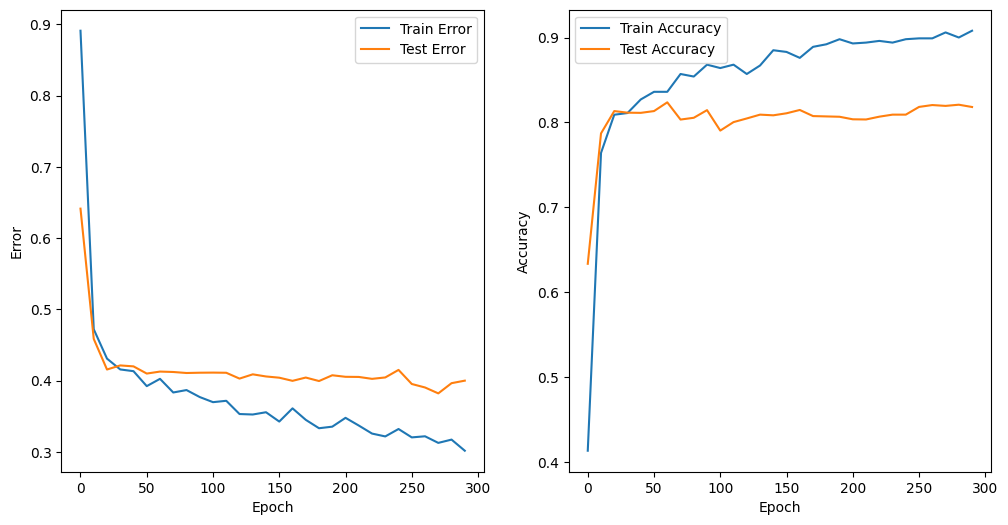

In [22]:
epochs = range(0, iterations, 10)
plt.figure(figsize=(12, 6))

# График ошибки
plt.subplot(1, 2, 1)
plt.plot(epochs, train_errors, label='Train Error')
plt.plot(epochs, test_errors, label='Test Error')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.legend()

# График точности
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracies, label='Train Accuracy')
plt.plot(epochs, test_accuracies, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [23]:
for i in range(11):
    layer_0 = test_images[i:i+1]
    layer_1 = relu(np.dot(layer_0, weights_0_1))
    layer_2 = np.dot(layer_1, weights_1_2)

    # The layer_2 contains the prediction for this input image
    prediction = layer_2

    # You can also find the predicted label by taking the argmax of the prediction
    predicted_label = np.argmax(prediction)

    # Now you can use the predicted_label for further processing or evaluation

    # If you want to compare the prediction to the ground truth label
    true_label = np.argmax(test_labels[i:i+1])

    print(f"Sample {i}: Predicted Label: {predicted_label}, True Label: {true_label}")
    

Sample 0: Predicted Label: 7, True Label: 7
Sample 1: Predicted Label: 6, True Label: 2
Sample 2: Predicted Label: 1, True Label: 1
Sample 3: Predicted Label: 0, True Label: 0
Sample 4: Predicted Label: 4, True Label: 4
Sample 5: Predicted Label: 1, True Label: 1
Sample 6: Predicted Label: 4, True Label: 4
Sample 7: Predicted Label: 9, True Label: 9
Sample 8: Predicted Label: 8, True Label: 5
Sample 9: Predicted Label: 9, True Label: 9
Sample 10: Predicted Label: 0, True Label: 0
